In [1]:
# mengimport Library yang dibutuhkan 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from skimage import data

In [2]:
# Membaca gambar menggunakan fungsi cv2.imread dan menyimpannya dalam variabel image
image = cv2.imread("Image/enola.jpg")  

# Mengubah citra img dari format BGR menjadi grayscale 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 


In [3]:
# Penerapan Histogram Equalization (HE)
# Melakukan equalisasi histogram pada gambar menggunakan fungsi cv2.equalizeHist() dan menyimpannya dalam variabel image_equalized
image_equalized = cv2.equalizeHist(image)  


In [4]:
# Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)
# Membuat objek CLAHE dan menyimpannya dalam variabel clahe
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8)) 

#Apply CLAHE to the original image
# Menggunakan objek CLAHE untuk menerapkan metode CLAHE pada gambar asli. 
image_clahe = clahe.apply(image) 

In [5]:
# Penerapan metode Contrast Stretching (CS)

# Create an empty array to store the final output
# Membuat array kosong dengan ukuran yang sama dengan gambar asli 
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')  

# Apply Min-Max Contrasting
# Menemukan nilai piksel minimum dan maksimum
min = np.min(image)  
max = np.max(image)   

for i in range(image.shape[0]):  # Looping untuk setiap baris dalam gambar
    for j in range(image.shape[1]):  # Looping untuk setiap kolom dalam gambar
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)  # Mengaplikasikan rumus Min-Max Contrasting pada setiap piksel gambar.  

In [6]:
# Penerapan Metode Perkalian Konstanta

# Membuat salinan gambar menggunakan metode copy() 
# mengubah tipe datanya menjadi float. Salinan ini disimpan dalam variabel copyCamera.
copyCamera = image.copy().astype(float)  

 # Mengambil ukuran gambar salinan menggunakan metode shape. 
 # Ukuran baris disimpan dalam variabel m1 dan ukuran kolom disimpan dalam variabel n1.
m1,n1 = copyCamera.shape 

# Membuat array kosong yang digunakan untuk menyimpan output.
output1 = np.empty([m1, n1])  

for baris in range(0, m1-1):  # Looping untuk setiap baris dalam gambar salinan
    for kolom in range(0, n1-1):  # Looping untuk setiap kolom dalam gambar salinan
        a1 = baris  # Variabel a1 diisi dengan nilai baris saat ini
        b1 = kolom  # Variabel b1 diisi dengan nilai kolom saat ini
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9  # Mengalikan nilai piksel pada gambar salinan dengan faktor 1.9 dan menyimpan hasilnya dalam array output1

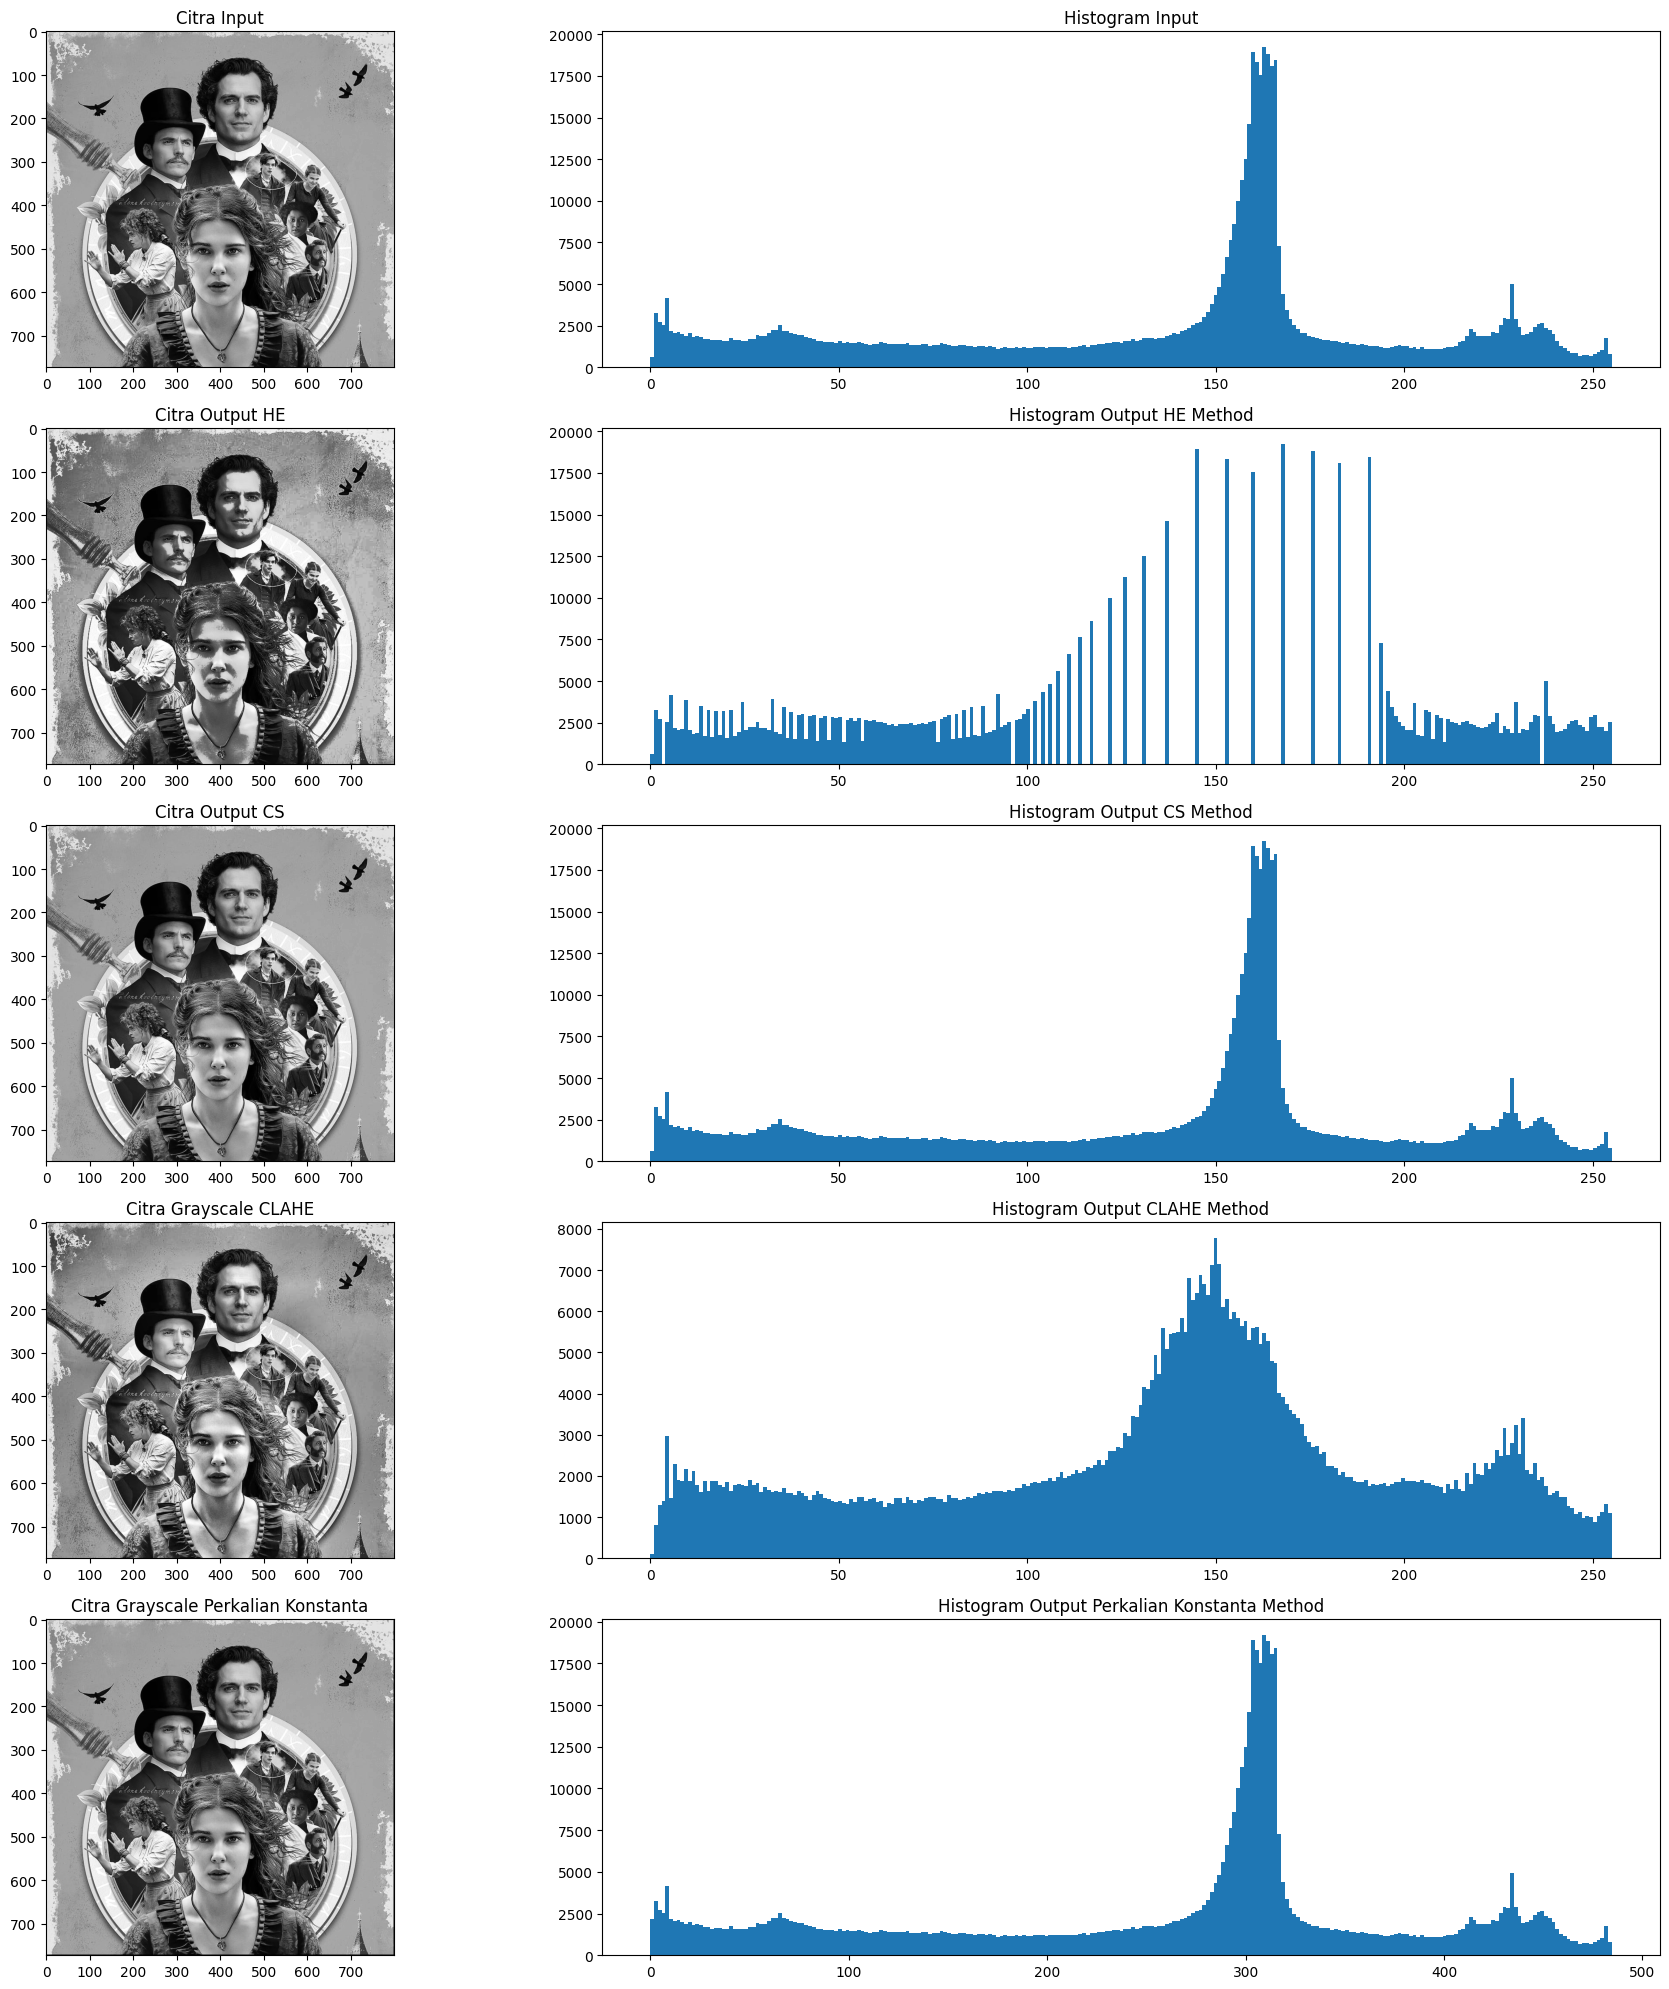

In [7]:
# Plot Image

# Membuat subplots dengan ukuran 5 baris dan 2 kolom, dan mengatur ukuran keseluruhan gambar menjadi 20x20.
# Hasilnya disimpan dalam variabel fig dan axes.
fig, axes = plt.subplots(5, 2, figsize=(20, 20))  

ax = axes.ravel()  

# Menampilkan gambar asli dalam axes pertama dan memberi title judul
ax[0].imshow(image, cmap=plt.cm.gray)   
ax[0].set_title("Citra Input")  #

# Menampilkan gambar asli dalam axes kedua dan memberi title judul
ax[1].hist(image.ravel(), bins=256)  
ax[1].set_title('Histogram Input')  

# Menampilkan citra hasil ekualisasi histogram dalam axes ketiga
ax[2].imshow(image_equalized, cmap=plt.cm.gray)  
ax[2].set_title("Citra Output HE")  

# Menampilkan citra hasil ekualisasi histogram dalam axes keempat
ax[3].hist(image_equalized.ravel(), bins=256)  
ax[3].set_title('Histogram Output HE Method')  

 # Menampilkan citra hasil kontras-stretching dalam axes kelima
ax[4].imshow(image_cs, cmap=plt.cm.gray)  
ax[4].set_title("Citra Output CS") 

# Menampilkan histogram citra hasil kontras-stretching dalam axes keenam
ax[5].hist(image_cs.ravel(), bins=256)  
ax[5].set_title('Histogram Output CS Method') 

# Menampilkan citra hasil CLAHE dalam axes ketujuh
ax[6].imshow(image_clahe, cmap=plt.cm.gray)   
ax[6].set_title("Citra Grayscale CLAHE")  

# Menampilkan histogram citra hasil CLAHE dalam axes kedelapan
ax[7].hist(image_clahe.ravel(), bins=256)   
ax[7].set_title('Histogram Output CLAHE Method')  

# Menampilkan citra hasil perkalian konstanta (`output1`) dalam axes kesembilan
ax[8].imshow(output1, cmap=plt.cm.gray)  
ax[8].set_title("Citra Grayscale Perkalian Konstanta") 

# Menampilkan histogram citra hasil perkalian konstanta (`output1`) dalam axes kesepuluh (indeks 9) menggunakan fungsi `hist()` dengan jumlah bin sebesar 256.
ax[9].hist(output1.ravel(), bins=256)  
ax[9].set_title('Histogram Output Perkalian Konstanta Method')  

fig.tight_layout()
